<h3>Sleep health and lifestyle dataset</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import datasets
from scipy import stats
%matplotlib inline

df = pd.read_csv('C:/Users/1/Desktop/уник/Datasets/Sleep_health_and_lifestyle_dataset.csv', sep = ',', header=0)
df.head(10)

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   
5                 4                       30             8        Obese   
6                 6                       40             7        Obese   
7                 7                       75             6       Normal   
8                 7                       75             6       Normal   
9                 7                       75             6       Normal   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea  
5         140/90          85         3000       Insomnia  
6         140/90          82         3500       Insomnia  
7         120/80          70         8000            NaN  
8         120/80          70         8000            NaN  
9         120/80          70         8000            NaN

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<h3>Basic numerical characteristics</h3>

In [3]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

__Number of people without sleep disorders - 219, with an attack of apnea - 78, with insomnia - 77__

In [4]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

__Number of people with normal weight - 216, overweight - 148, obese - 10__

In [5]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal') # combining normal weight and normal
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None') # replacement of nan (we assume that there are no violations)

In [6]:
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

__Visual distribution in the sample according to two characteristics__

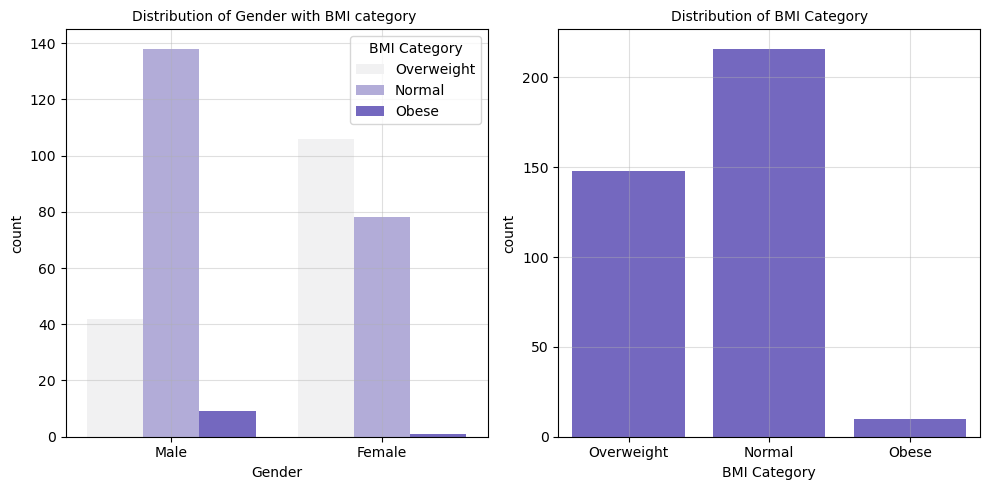

In [8]:
figure, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=df, x='Gender', hue='BMI Category', ax = axes[0], color='slateblue')
axes[0].set_title('Distribution of Gender with BMI category ', fontsize=10)
axes[0].grid(alpha=0.4)

sns.countplot(data=df, x='BMI Category', ax = axes[1], width= 0.8, color='slateblue' )
axes[1].set_title('Distribution of BMI Category', fontsize=10)
axes[1].grid(alpha=0.4)

plt.tight_layout()
plt.show()

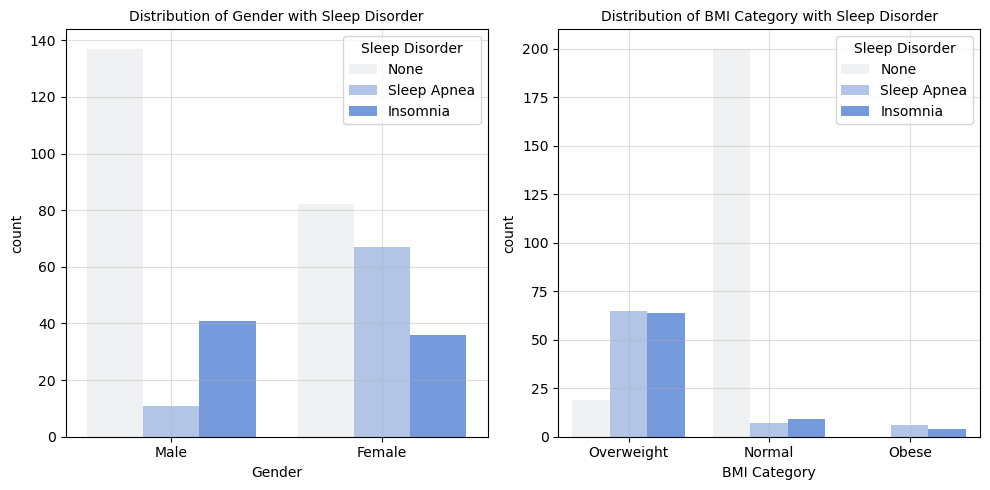

In [9]:
figure, axes = plt.subplots(1,2, figsize=(10,5))

sns.countplot(data=df, x='Gender', hue='Sleep Disorder', ax = axes[0], width= 0.8, color='cornflowerblue' )
axes[0].set_title('Distribution of Gender with Sleep Disorder', fontsize=10)
axes[0].grid(alpha=0.4)

sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', ax = axes[1], color='cornflowerblue')
axes[1].set_title('Distribution of BMI Category with Sleep Disorder', fontsize=10)
axes[1].grid(alpha=0.4)


plt.tight_layout()
plt.show()

<h3>Histograms for basic numerical indicators</h3>

Text(0.5, 1.0, 'Daily Steps')

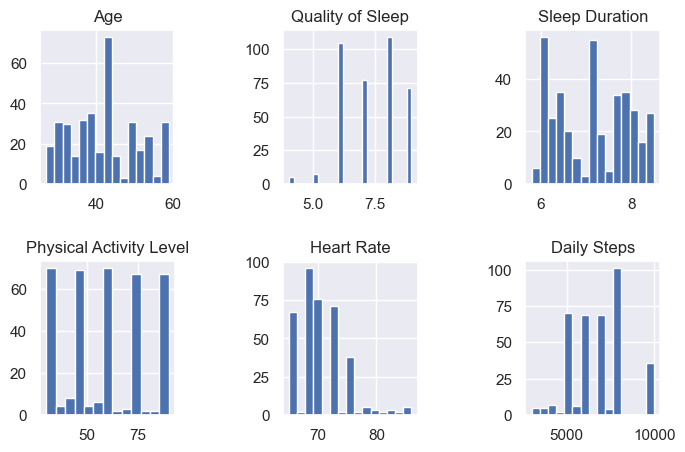

In [10]:
age = list(df.Age)
plt.style.use("seaborn-v0_8-whitegrid")
sns.set()

fig, axs = plt.subplots(2, 3)
fig.set_size_inches(w = 8, h = 5)

fig.subplots_adjust(wspace= 0.8, hspace=0.5)

axs[0, 0].hist(df['Age'],  bins = 15 )
axs[0, 0].set_title('Age')

axs[0, 1].hist(df['Quality of Sleep'], bins = 25)
axs[0, 1].set_title('Quality of Sleep')

axs[0, 2].hist(df['Sleep Duration'],  bins = 15) 
axs[0, 2].set_title('Sleep Duration')

axs[1, 0].hist(df['Physical Activity Level'],  bins = 13) 
axs[1, 0].set_title('Physical Activity Level')

axs[1, 1].hist(df['Heart Rate'],  bins = 15 )
axs[1, 1].set_title('Heart Rate')

axs[1, 2].hist(df['Daily Steps'],  bins = 15 )
axs[1, 2].set_title('Daily Steps')

___Comparison of sleep duration distributions for women and men using Student's t test____

C:\Users\1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


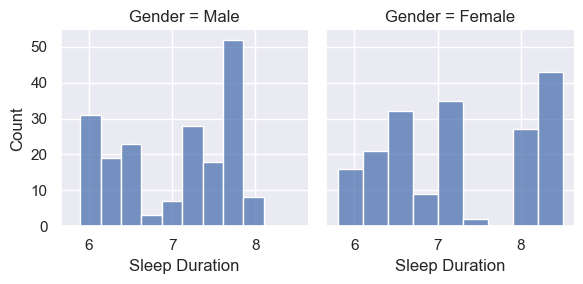

In [11]:
g = sns.FacetGrid (data = df, col='Gender', col_wrap= 2 )

#add histograms to each plot
g. map (sns.histplot, 'Sleep Duration' )

In [12]:
sleep_male = df[df['Gender'] == 'Male']['Sleep Duration']
sleep_famale = df[df['Gender'] == 'Female']['Sleep Duration']

t_statistic, p_value = stats.ttest_ind(sleep_male, sleep_famale)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
alpha = 0.05  # Set the significance level (for p-value)
if p_value < alpha:
    print("There is a significant difference in sleep duration between independent groups")
else:
    print("There is no significant difference in sleep duration between independent groups")

T-Statistic: -2.3624469898393397
P-Value: 0.018668859270607456
There is a significant difference in sleep duration between independent groups


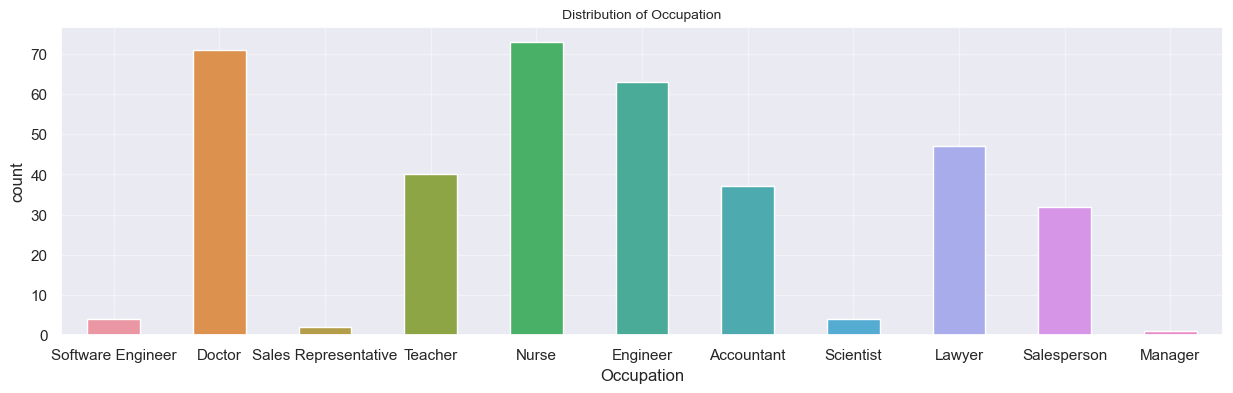

In [14]:
figure, axes = plt.subplots(1, figsize=(15,4))
sns.countplot(data=df, x='Occupation', width=0.5)
axes.set_title('Distribution of Occupation', fontsize=10)
axes.grid(alpha=0.4)

C:\Users\1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


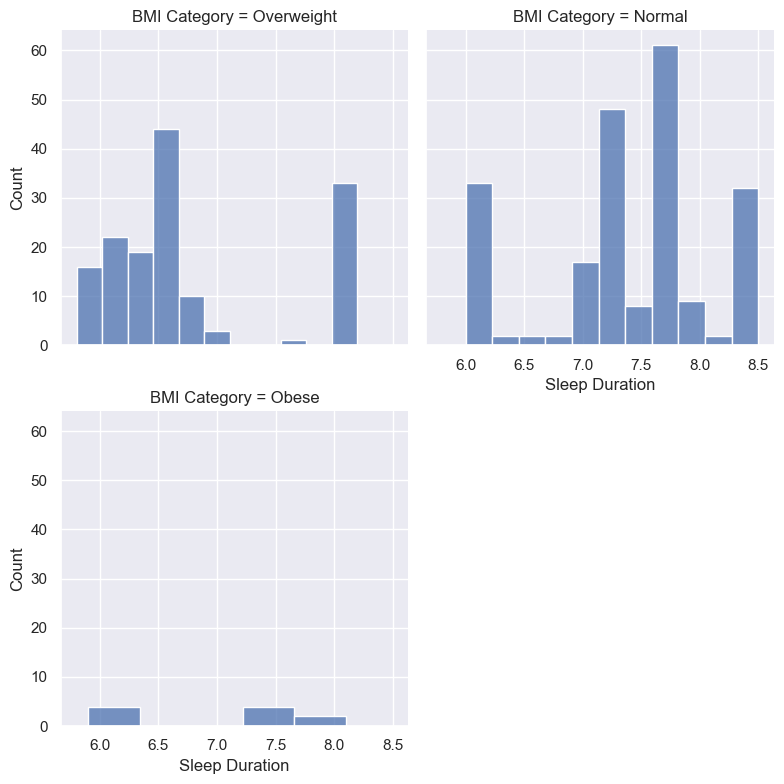

In [15]:
g = sns.FacetGrid (data = df, col='BMI Category', col_wrap= 2, height=4 )

#add histograms to each plot
g. map (sns.histplot, 'Sleep Duration' )

C:\Users\1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


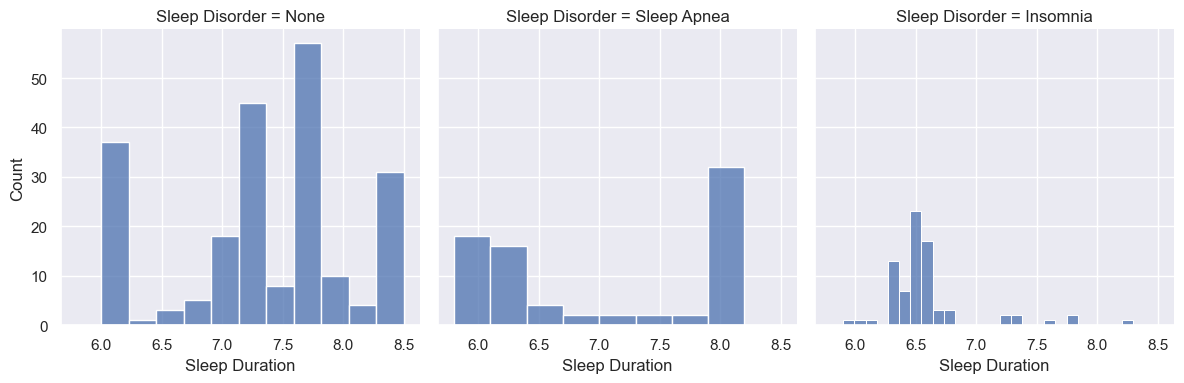

In [16]:
g = sns.FacetGrid (data = df, col='Sleep Disorder', col_wrap= 3, height=4 )

g. map (sns.histplot, 'Sleep Duration' )

<h3>Covariance Study</h3>

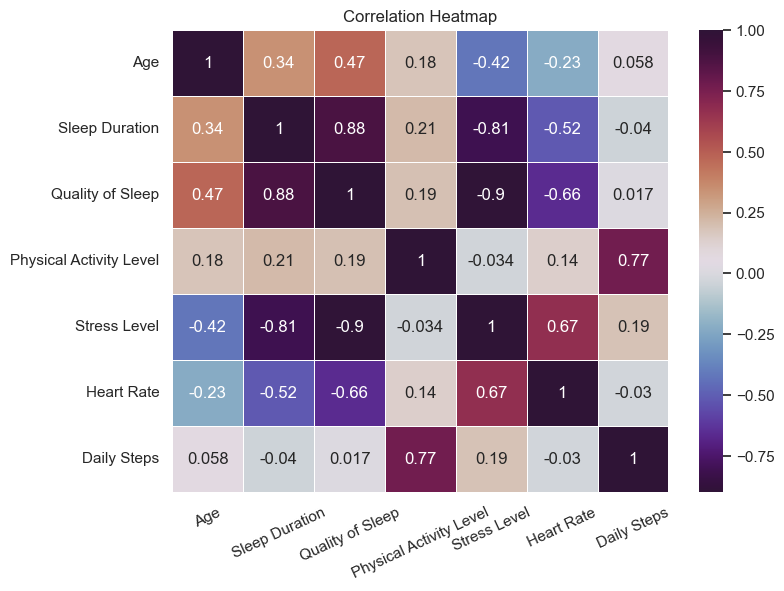

In [17]:
numeric_data = df.drop(columns =['Person ID'], axis=1 ).select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight_shifted', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=25)
plt.show()

<h3>Linear relationship by gender</h3>

C:\Users\1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


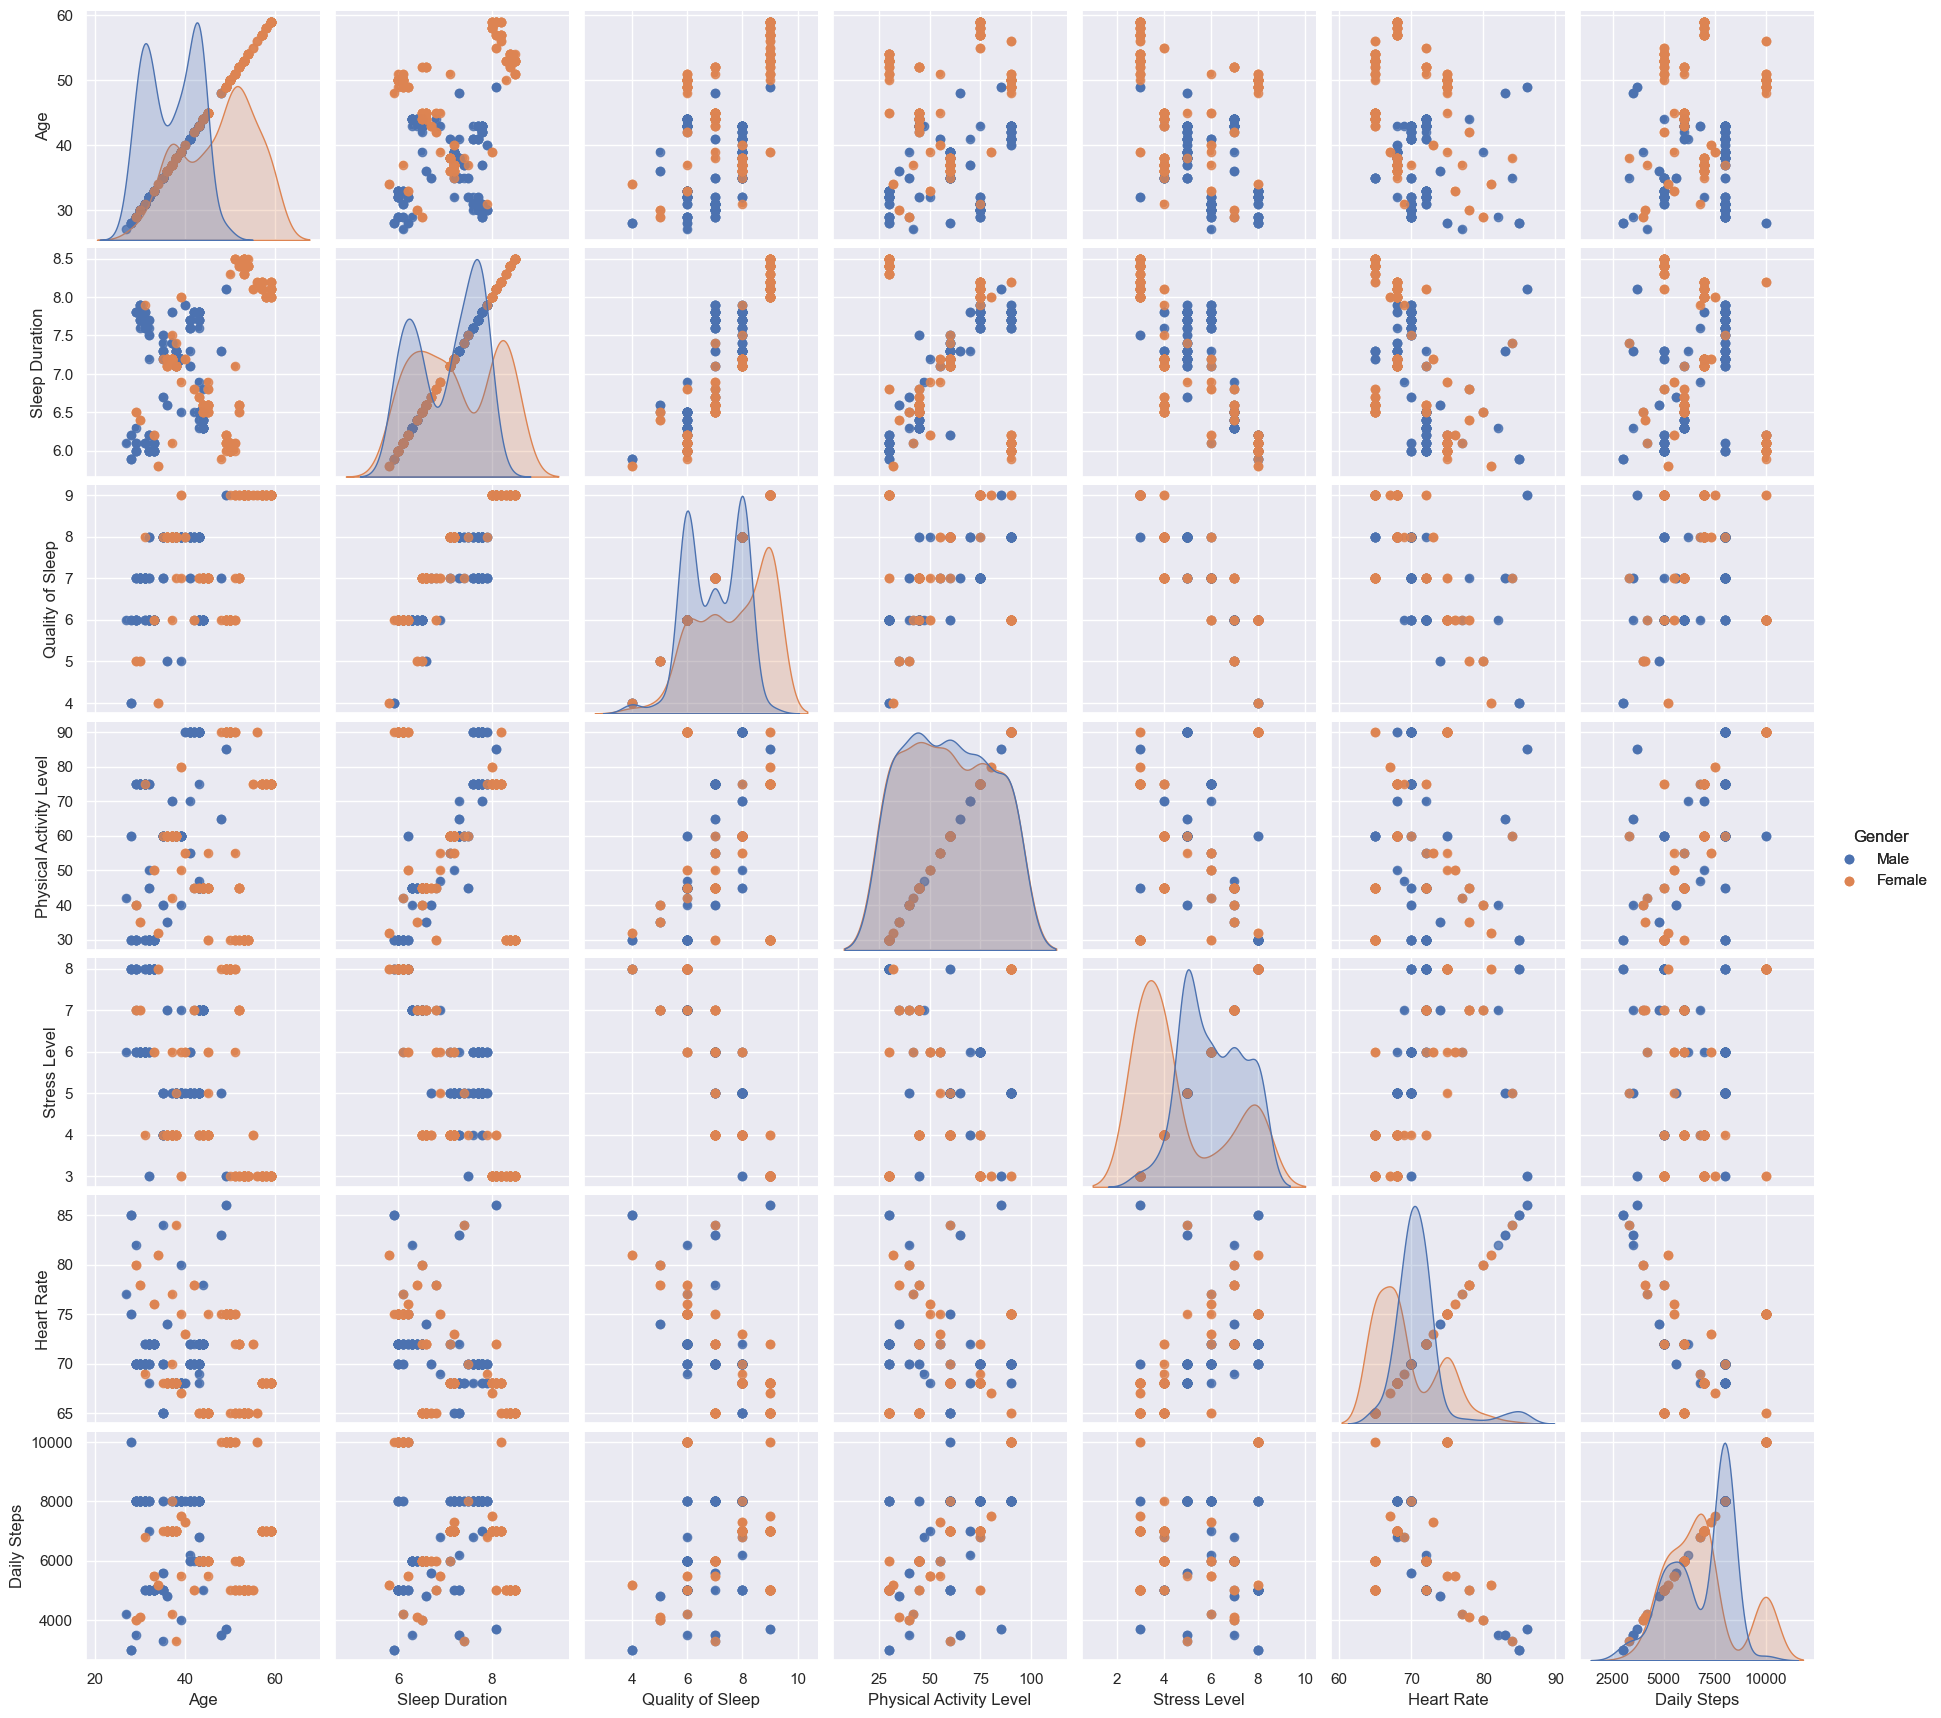

In [18]:
g = sns.pairplot(df, vars=['Age', 'Sleep Duration', 'Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate', 'Daily Steps' ], hue='Gender', height=2.5)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()

<h3>Linear relationship divided by BMI category</h3>

C:\Users\1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


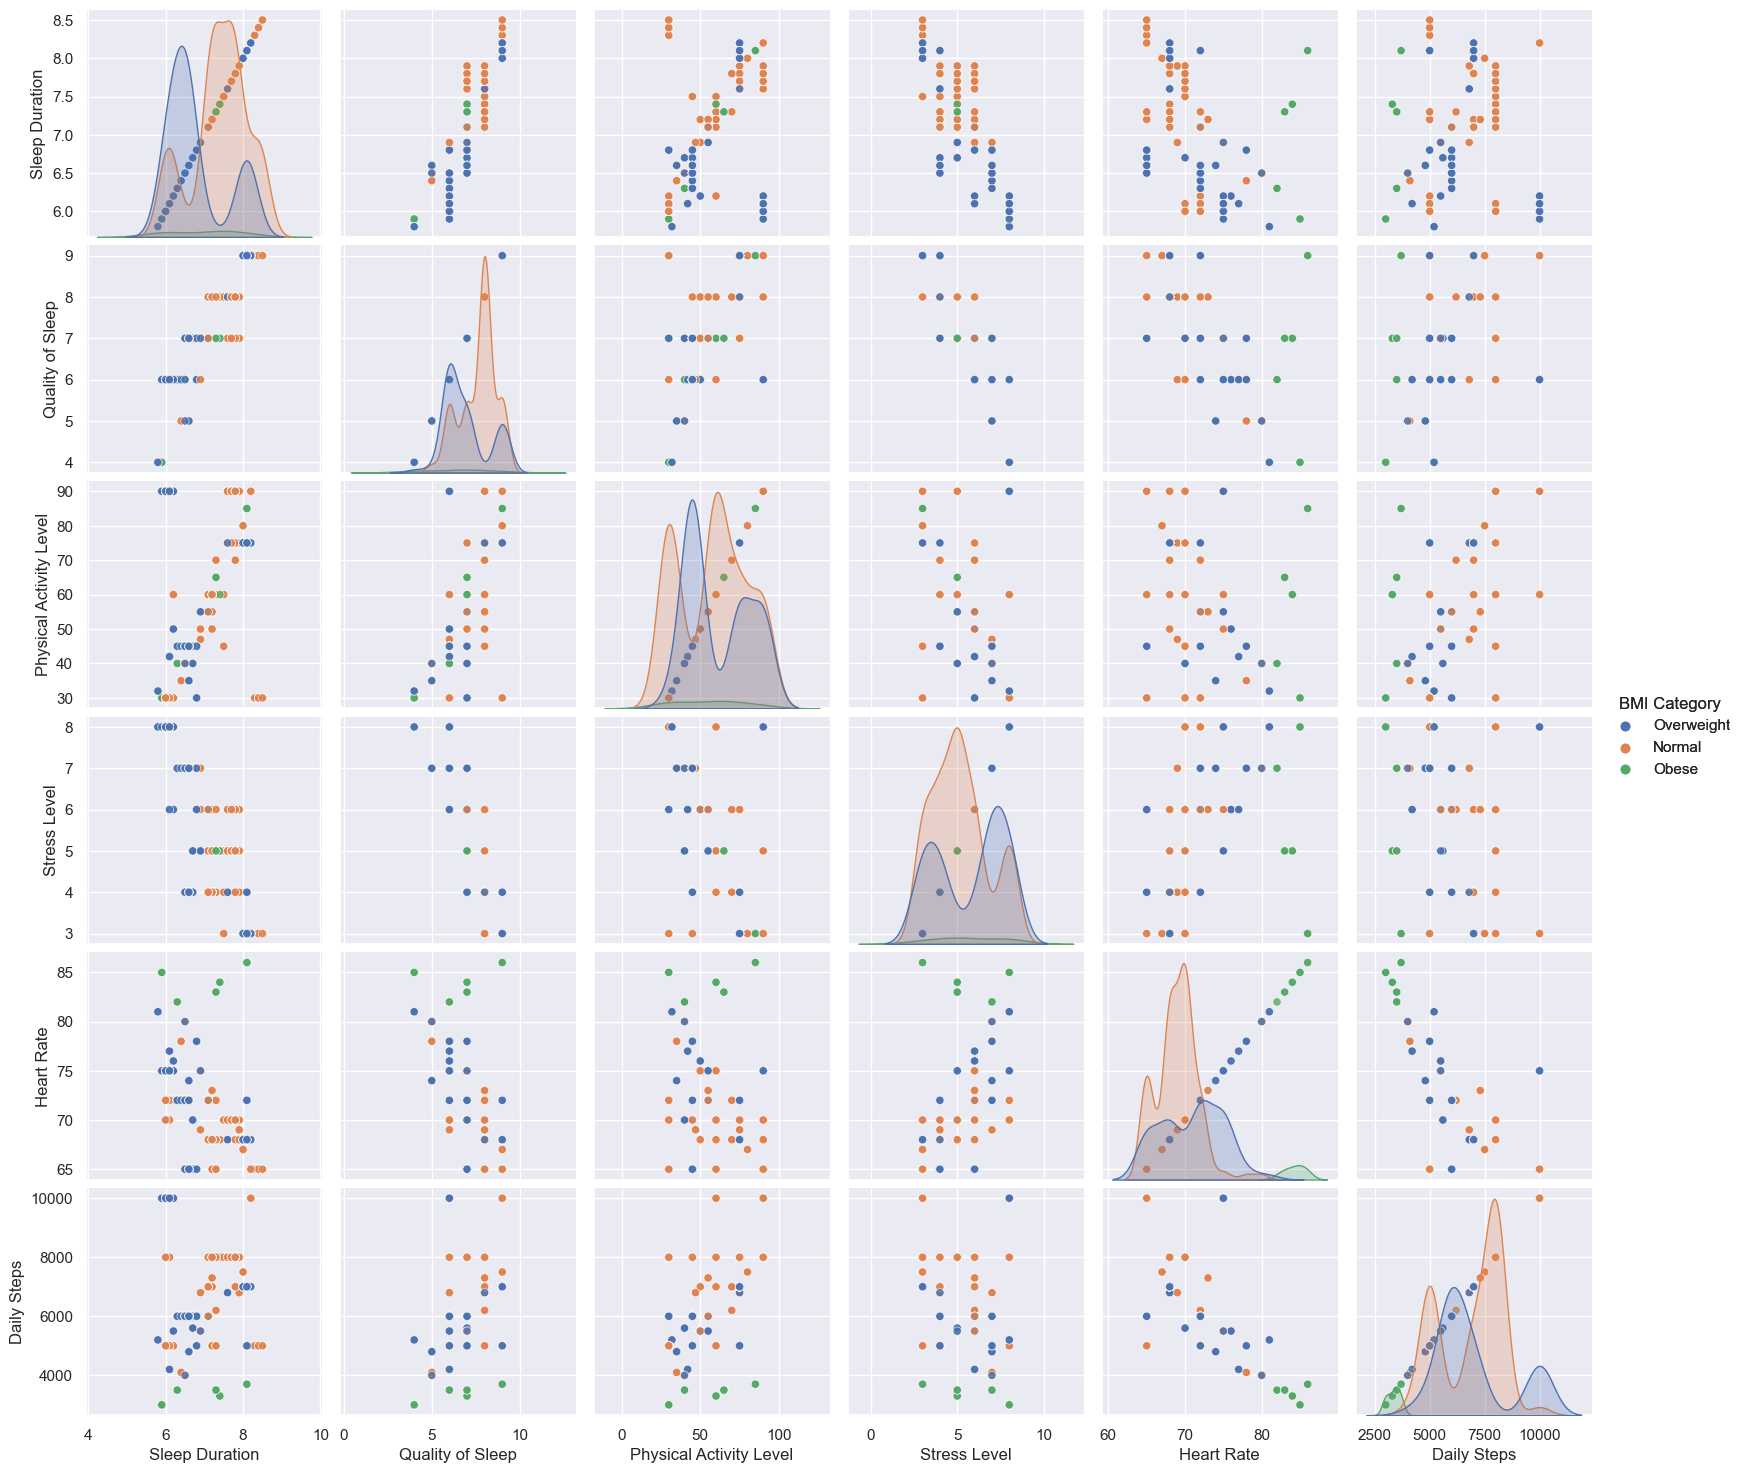

In [19]:
g = sns.pairplot(df, vars=['Sleep Duration', 'Quality of Sleep',
                           'Physical Activity Level','Stress Level','Heart Rate',
                           'Daily Steps'], 
                 hue='BMI Category', 
                 height=2.5)
g.map(sns.scatterplot, alpha = 0.8)
g.add_legend()

<h3>Linear relationship divided by sleep disorder</h3>

C:\Users\1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


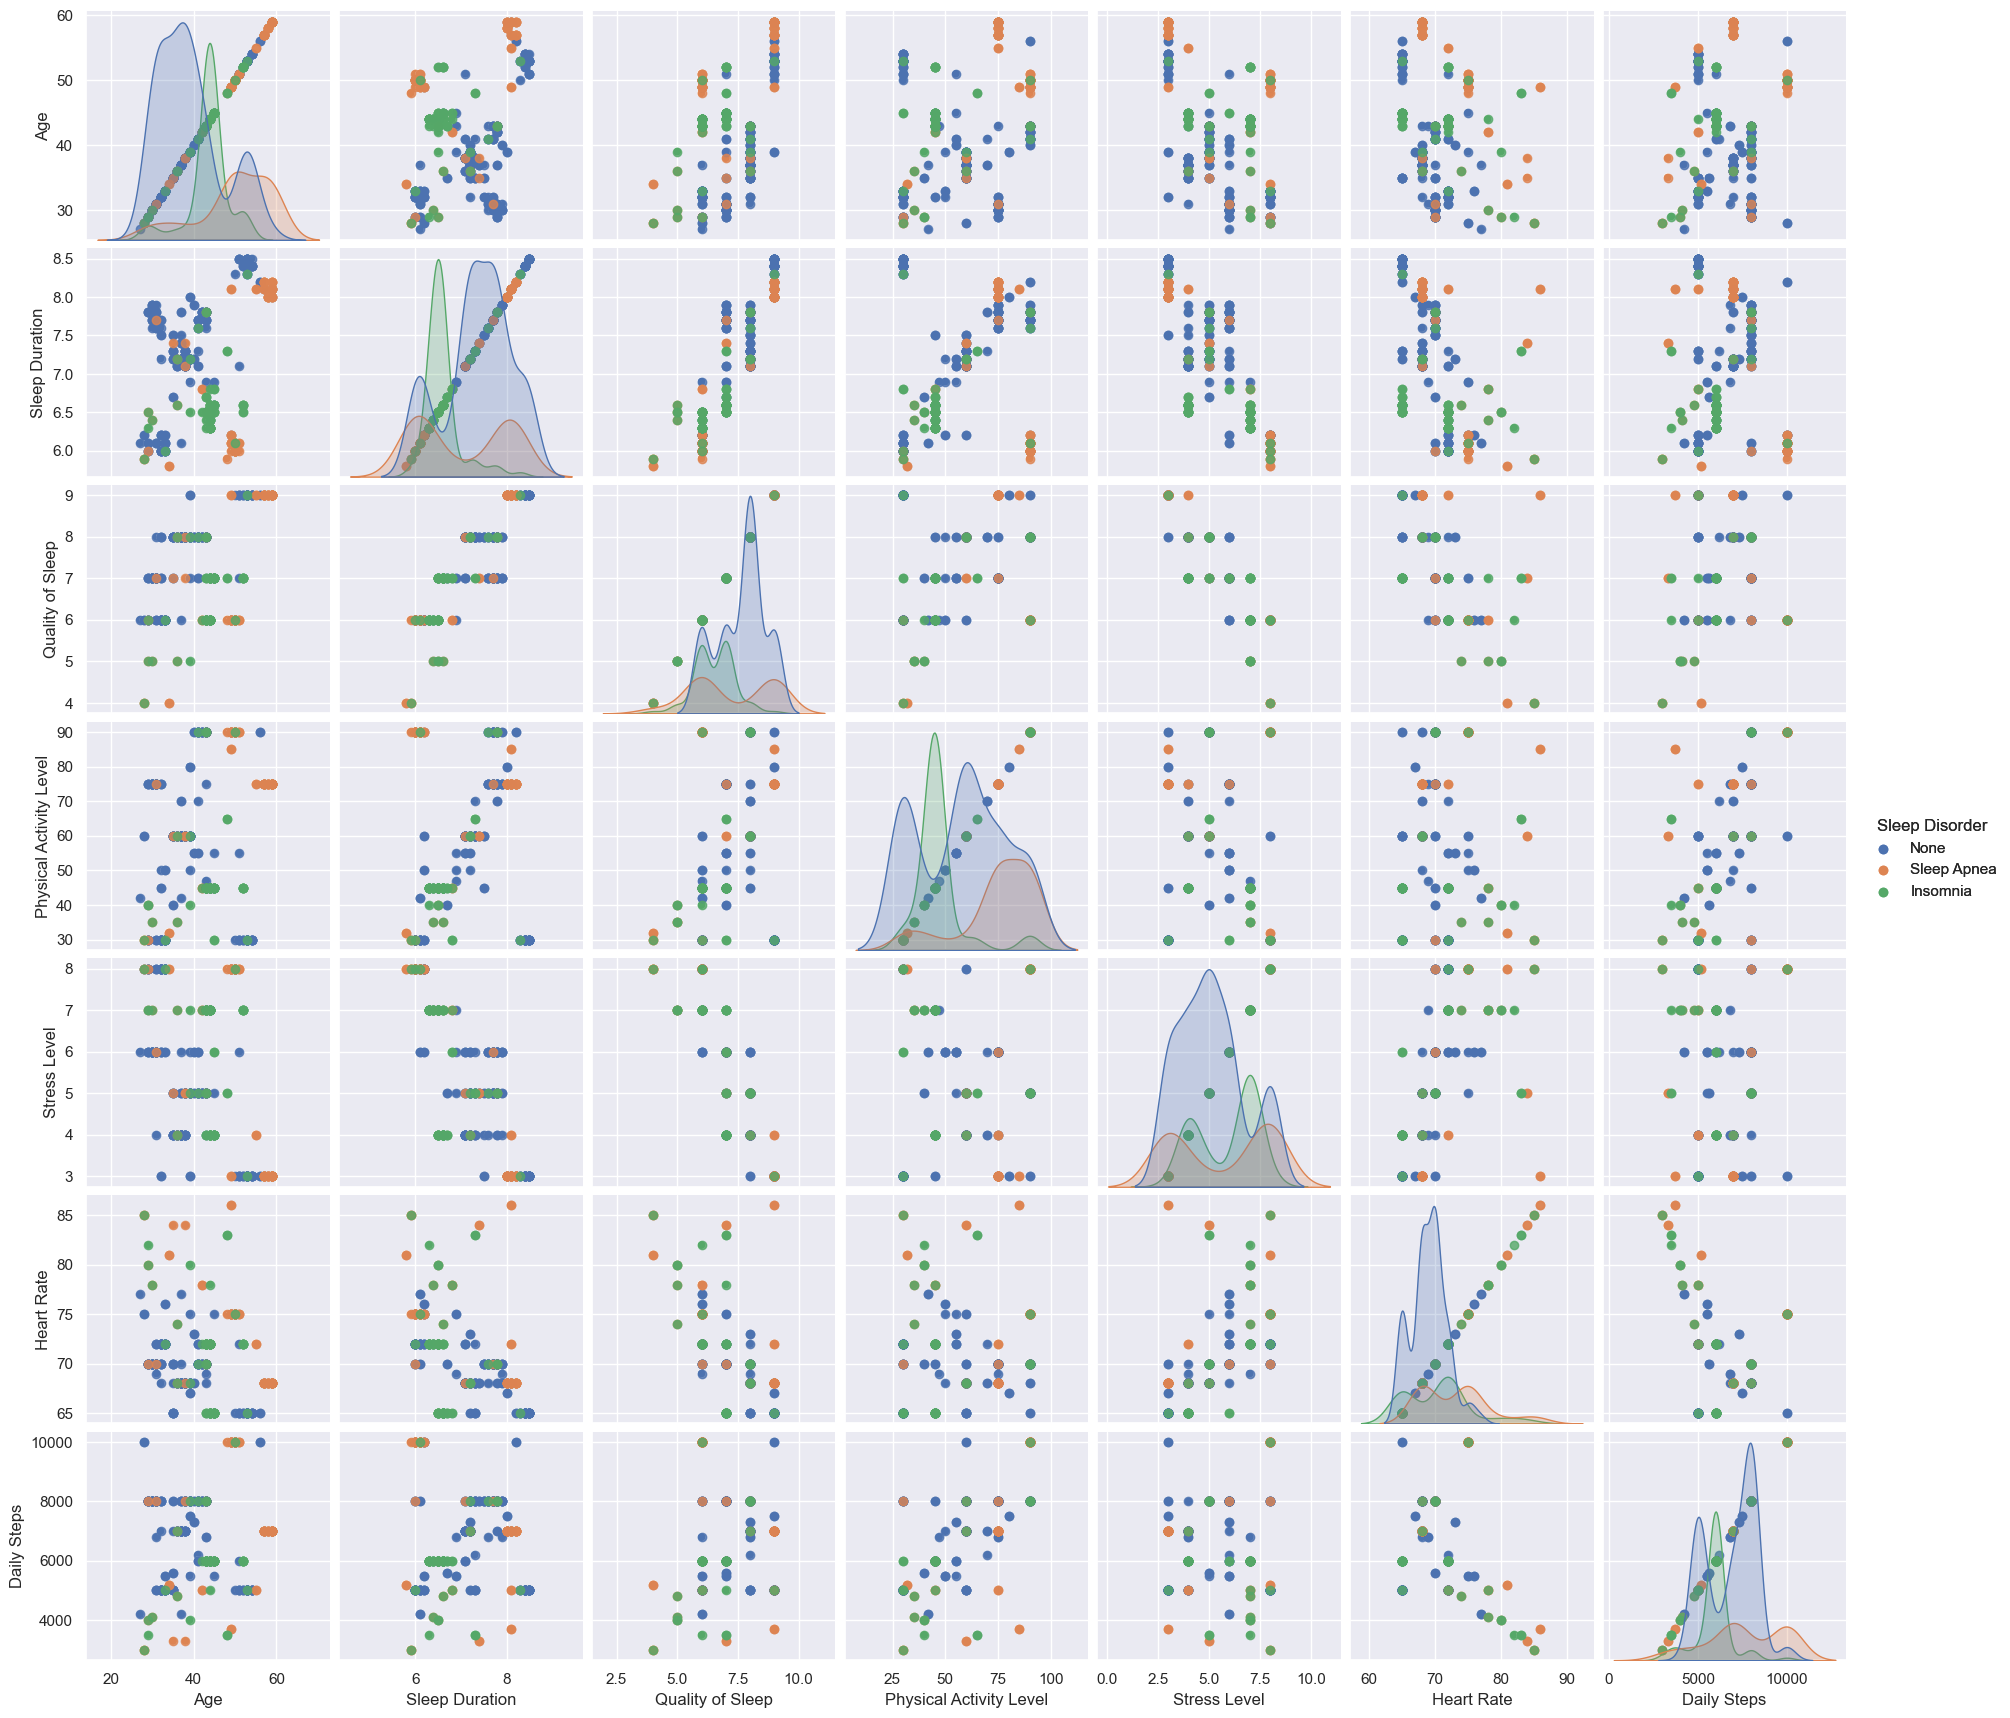

In [20]:
g = sns.pairplot(df, vars=['Age', 'Sleep Duration', 'Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate', 'Daily Steps' ], hue='Sleep Disorder', height=2.5)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()

<h1>Study of sleep disorders</h1>

__Разделение по половому признаку__

In [21]:
df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

__Student's t test for two independent samples (sleep disorders) (T-Statistic: -6.31)__

In [22]:
data_of_disorder = df.replace(['Sleep Apnea', 'Insomnia', 'None'], ['yes', 'yes', 'no']).copy()

with_sleep_disorder = data_of_disorder[data_of_disorder['Sleep Disorder'] == 'yes']['Quality of Sleep']
without_sleep_disorder = data_of_disorder[data_of_disorder['Sleep Disorder'] == 'no']['Quality of Sleep']

t_statistic, p_value = stats.ttest_ind(with_sleep_disorder, without_sleep_disorder)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
alpha = 0.05  # Set the significance level (for p-value)
if p_value < alpha:
    print("There is a significant difference in sleep quality between independent groups")
else:
    print("There is no significant difference in sleep quality between independent groups")

T-Statistic: -6.310971286065852
P-Value: 7.891508863720975e-10
There is a significant difference in sleep quality between independent groups


__Dependence of blood pressure on age__

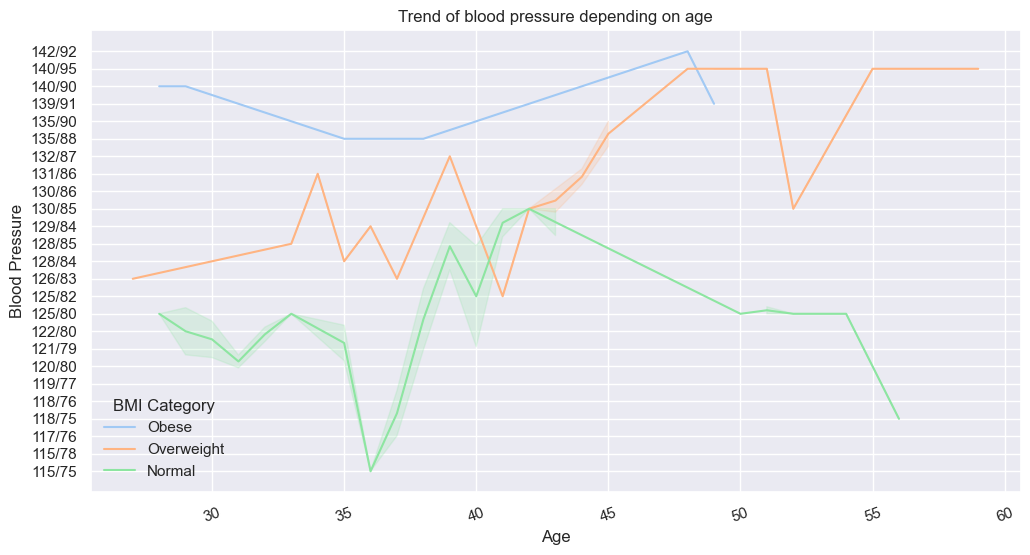

In [23]:
new_df = df.sort_values (by = ['Blood Pressure'], ascending = [ False ])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Blood Pressure', data=new_df, errorbar="se", hue = 'BMI Category', palette="pastel")
plt.title("Trend of blood pressure depending on age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.xticks(rotation=20)
plt.show()

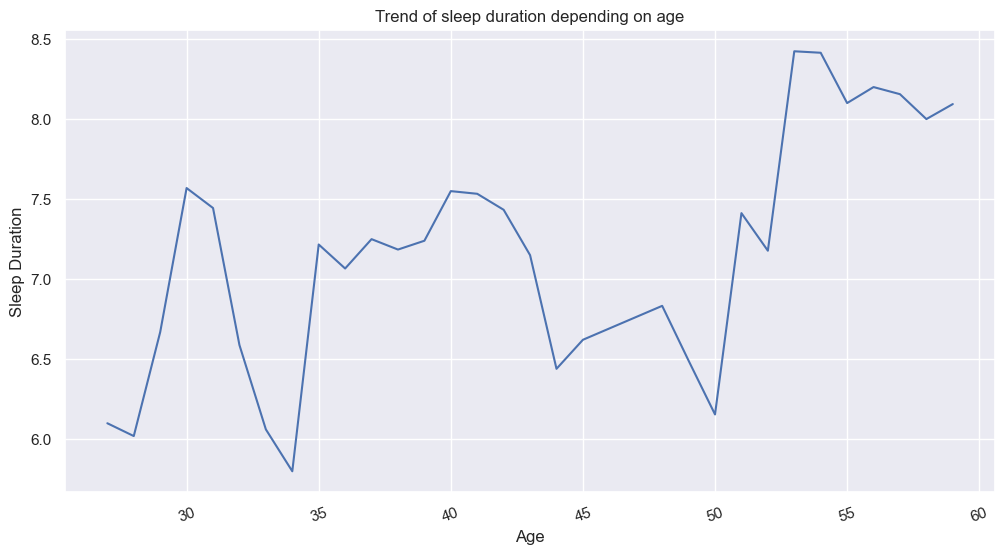

In [24]:
new_df = df.sort_values (by = ['Age'], ascending = [ True ])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Sleep Duration', data=new_df, errorbar=None)
plt.title("Trend of sleep duration depending on age")
plt.xlabel("Age")
plt.ylabel("Sleep Duration")
plt.xticks(rotation=20)
plt.show()

<h3>3d model of the relationship between BMI category, blood pressure and heart rate</h3>

In [25]:
new_df = df.sort_values (by = ['Blood Pressure'], ascending = [ False ])

fig=px.scatter_3d(data_frame=new_df,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=800,height=600,
                  color_discrete_sequence=['#4A235A','#C39BD3','blueviolet'])


fig.update_layout(title='The relationship between BMI Category, Blood Pressure and Heart Rate',
                  titlefont={'size': 20,'family': 'Serif'},
                  showlegend=True)

fig.show()